In [1]:
import numpy as np, matplotlib.pyplot as plt, math
plt.style.use("dark_background")

In [2]:
def heighway_grow(point1, point2):
    """
    The function takes two points and calculates the 3 corresponding Heighway points,
    puts their x-values in xs list and their y-values in ys list, and returns
    these two lists as numpy arrays.
    The 3 points are named point_start, point_mid and point_end.
    """


    # The length of the new lines will be 1/sqrt(2) of the original lines:
    length = (math.dist(point1, point2)) * np.sqrt(2) / 2
    # The angle of the line drawn through the two initiating points will be calculated in the following line.
    # np.arctan() is problematic in negative angles because its
    # output is in the interval [-pi/2, pi/2];
    # so np.arctan2() is used instead, because its output is in [-pi, pi].
    theta = np.arctan2((point2[1] - point1[1]), (point2[0] - point1[0]))
    # The 3 Koch points are calculated:
    point_start = np.array(point1.copy())
    point_end = np.array(point2.copy())
    point_mid = np.array((point_start[0] + length * np.cos(theta + np.pi/4),
                    point_start[1] + length * np.sin(theta + np.pi/4)))
    # The x's and y's of the 3 Heighway points are put into these lists:
    xs = list()
    ys = list()
    for point in [point_start, point_mid, point_end]:
        xs.append(point[0])
        ys.append(point[1])
    # Finally the two lists are turned into numpy arrays and returned:
    return np.array(xs), np.array(ys)

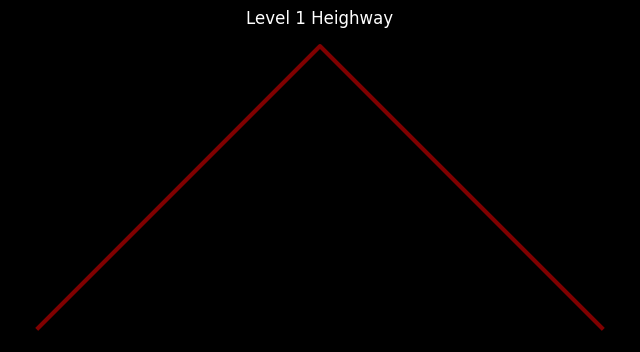

In [3]:
"""
If a straight line is level-0 of Heighway fractals, this cell draws the level-1 Heighway fractal.
"""


# An arbitrary starting point for the line.
anchor = 0
# The length of the line, and thus the final fractal.
line_length = 6
# Lower left corner:
point1 = np.array([anchor, anchor])
# Lower right corner:
point2 = np.array([anchor + line_length, anchor])

# Applying the function on the points and obtaining the x's and y's of the 3 Heighway points:
xs, ys = heighway_grow(point1, point2)

# Plotting:
fig, ax = plt.subplots(figsize=(8,8))
ax.clear()
ax.set_aspect("equal")
ax.set_axis_off()
ax.set_title(f"Level 1 Heighway")
ax.plot(xs, ys, linewidth=3, color="r", alpha=0.5);

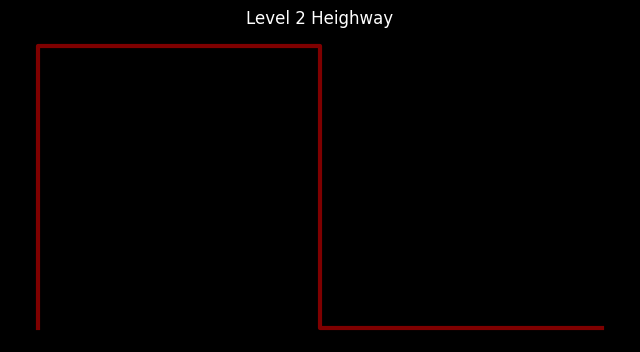

In [4]:
"""
This cell tests a for-loop approach for Heighway fractals of level 2 and above. This creates a level-2 fractal.
"""


# The lists a and b will gradually grow and contain all the x's and y's required to plot the fractal
# all-together in a final step.
a =list()
b = list()

a.append(xs[0])

b.append(ys[0])
for i in range(len(xs)-1):
    point1 = np.array([xs[i], ys[i]])
    point2 = np.array([xs[i+1], ys[i+1]])
    # Extending a and b and adding the new fractal points:
    if i%2==0:
        a.extend(heighway_grow(point1, point2)[0][1:])
        b.extend(heighway_grow(point1, point2)[1][1:])
    else:
        # point1, point2 = point2, point1
        a.append(heighway_grow(point2, point1)[0][1])
        b.append(heighway_grow(point2, point1)[1][1])
        a.append(point2[0])
        b.append(point2[1])


# The final step is to plot all the points:
fig, ax = plt.subplots(figsize=(8,8))
ax.clear()
ax.set_aspect("equal")
ax.set_axis_off()
ax.set_title("Level 2 Heighway")
ax.plot(a, b, linewidth=3, color="r", alpha=0.5);

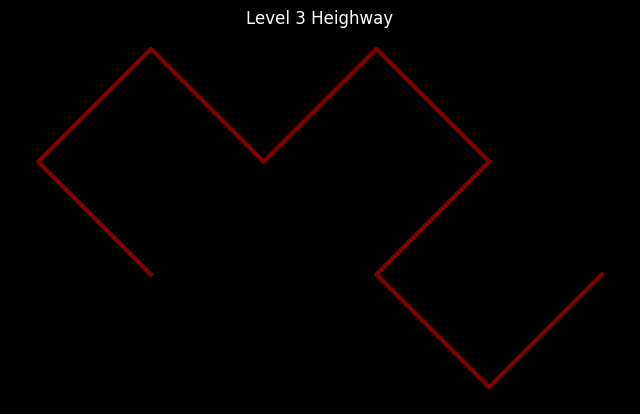

In [5]:
"""
This cell generalizes the for-loop approach introduced in the previous cell
to draw any desired level of the Heighway fractal.
"""


anchor = 0
line_length = 6
a = list([anchor, anchor + line_length])
b = list([anchor, anchor])
# The arbitrary desired level:
heighway_level = 3

for iterate in range(heighway_level):
    atemp = a.copy()
    btemp = b.copy()
    lena = len(atemp) - 1
    a.clear()
    a.append(atemp[0])
    b.clear()
    b.append(btemp[0])
    for i in range(lena):
        point1 = np.array([atemp[i], btemp[i]])
        point2 = np.array([atemp[i+1], btemp[i+1]])
        # Due to the decleration of the heighway_grow() function, I had to split the for-loop
        # to even and odd steps and mend the code!
        if i%2==0:
            a.extend(heighway_grow(point1, point2)[0][1:])
            b.extend(heighway_grow(point1, point2)[1][1:])
        elif i%2!=0:
            a.append(heighway_grow(point2, point1)[0][1])
            b.append(heighway_grow(point2, point1)[1][1])
            a.append(point2[0])
            b.append(point2[1])


# Plotting:
fig, ax = plt.subplots(figsize=(8,8))
ax.clear()
ax.set_aspect("equal")
ax.set_axis_off()
ax.set_title(f"Level {heighway_level} Heighway")
ax.plot(a, b, linewidth=3, color="r", alpha=0.5);

In [6]:
"""
Defining an ultimate function to draw any Heighway fractal of the user's liking
based on the previous cell.
"""


def draw_heighway(heighway_level, figsize=(8,8), linewidth=3, color="r", alpha=0.5, double_colored=True):
    anchor = 0
    line_length = 10
    a = list([anchor, anchor + line_length])
    b = list([anchor, anchor])
    heighway_level = heighway_level

    for iterate in range(heighway_level):
        atemp = a.copy()
        btemp = b.copy()
        lena = len(atemp) - 1
        a.clear()
        a.append(atemp[0])
        b.clear()
        b.append(btemp[0])
        for i in range(lena):
            point1 = np.array([atemp[i], btemp[i]])
            point2 = np.array([atemp[i+1], btemp[i+1]])
            if i%2==0:
                a.extend(heighway_grow(point1, point2)[0][1:])
                b.extend(heighway_grow(point1, point2)[1][1:])
            elif i%2!=0:
                a.append(heighway_grow(point2, point1)[0][1])
                b.append(heighway_grow(point2, point1)[1][1])
                a.append(point2[0])
                b.append(point2[1])
    

    # Plotting:
    fig, ax = plt.subplots(figsize=figsize)
    ax.clear()
    ax.set_aspect("equal")
    ax.set_axis_off()
    # The points are seperated to two sets for double-colored plots.
    # The figure object will also be returned so that it can be saved.
    if double_colored:
        ax.set_title(f"Level {heighway_level} double-colored Heighway")
        ax.plot(a[:(len(a)//2)+1], b[:(len(a)//2)+1], linewidth=1, color="gold", alpha=alpha)
        ax.plot(a[(len(a)//2):], b[(len(a)//2):], linewidth=1, color="aqua", alpha=alpha)
        return fig
    else:
        ax.set_title(f"Level {heighway_level} Heighway")
        ax.plot(a, b, linewidth=linewidth, color=color, alpha=alpha)
        return fig

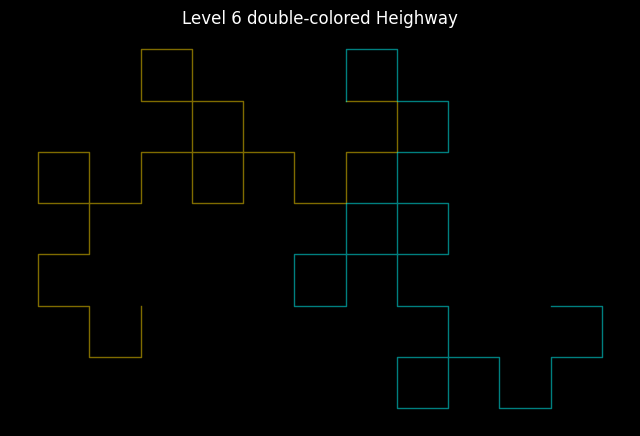

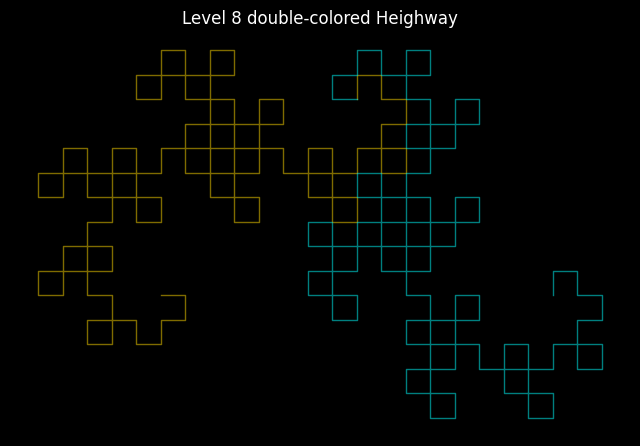

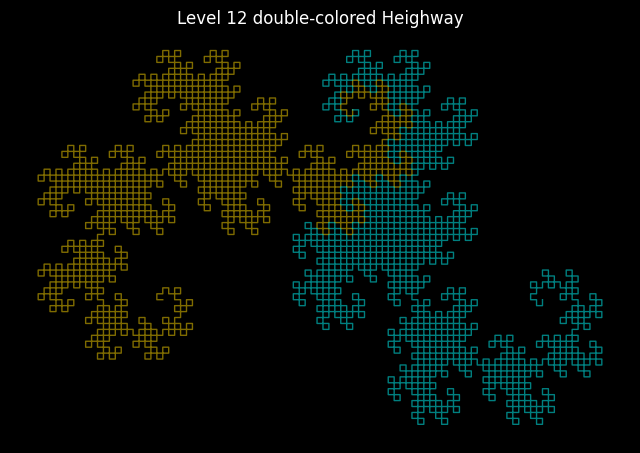

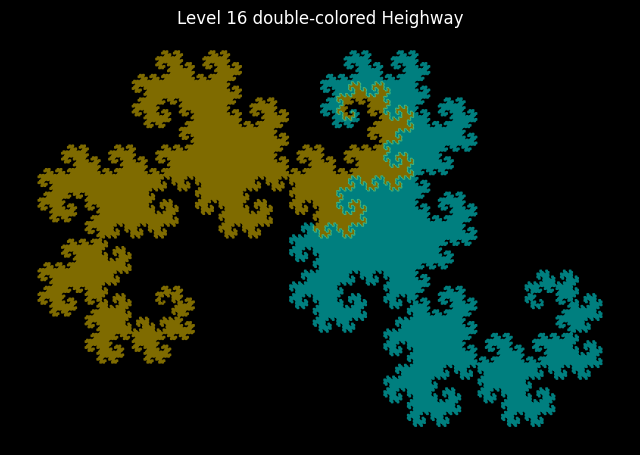

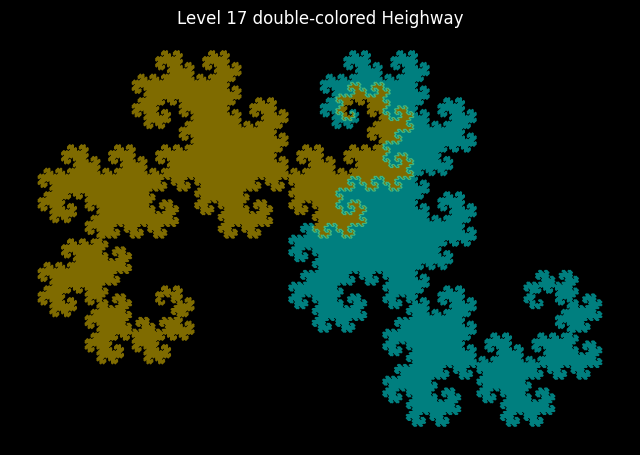

In [7]:
for level in [6, 8, 12, 16, 17]:
    figure = draw_heighway(level)
    figure.savefig(f"Level_{level}Heighway.jpg")

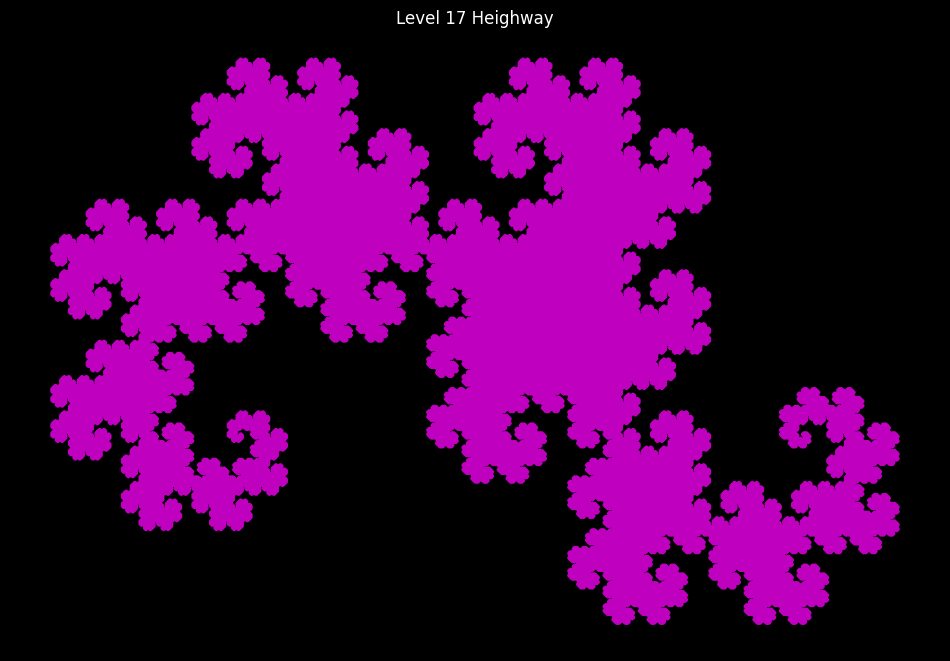

In [8]:
draw_heighway(17, double_colored=False, color="m", linewidth=3, alpha=1, figsize=(12,12));